<a href="https://colab.research.google.com/github/shanmukhareddygali/Health-Insurance-Cross-Sell-Prediction-using-Machine-Learning/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [241]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,precision_score, recall_score, f1_score,accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Dataset Loading

In [242]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [243]:
#Import dataset
df = pd.read_csv("/content/drive/My Drive/health insurance cross sell.csv")    #read_csv functions reads csv file

### Dataset First View

In [244]:
# Dataset First Look
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Dataset Rows & Columns count

In [245]:
# Dataset Rows & Columns count

df.shape    #shape function returns no of rows and columns

(381109, 12)

### Dataset Information

In [246]:
# Dataset Info
df.info() #info function gives data types and null values information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [247]:
# Dataset Duplicate Value Count
df.duplicated().sum()   #duplicated function gives duplicated values

0

#### Missing Values/Null Values

In [248]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [249]:
# Dataset Columns
df.columns #gives name of all columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [250]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License : 0 - Customer does not have DL,1 - Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 - Customer already has Vehicle Insurance, 0-Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage : 1 - Customer got his/her vehicle damaged in the past. 0 -Customer didn't get his/her
vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 - Customer is interested, 0 - Customer is not interested

### Check Unique Values for each variable.

In [251]:
# Check Unique Values for each variable.
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [252]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [253]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [254]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [255]:
# Write your code to make your dataset analysis ready.
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

1.How age of the customers distributed?

<Axes: xlabel='Age', ylabel='Count'>

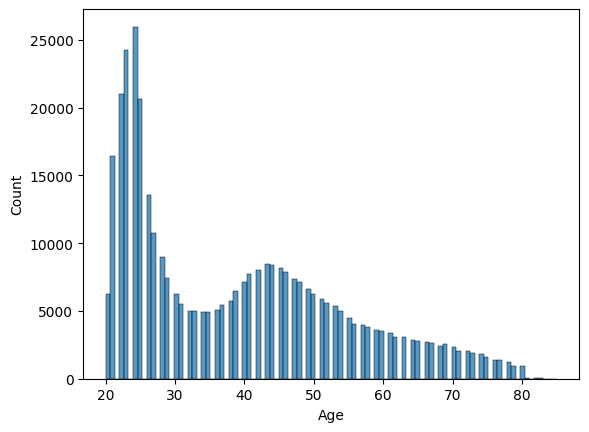

In [256]:
# Chart - 1 visualization code
fig1 = sns.histplot(df['Age'])
fig1

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.More number of customers are present between age 20 and 30.

2.Customers from age group of 40 to 50 are more than age group 30 - 40.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

2.How many customers accepted plan ?

In [257]:
# Chart - 2 visualization code
fig2 = df['Response'].value_counts()
fig2

0    334399
1     46710
Name: Response, dtype: int64

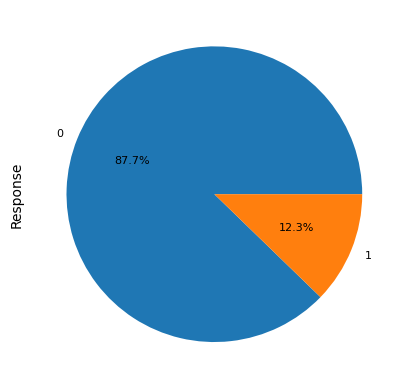

In [258]:
fig2.plot.pie(labels = fig2.index ,autopct = '%.1f%%',fontsize=8,labeldistance=1.1)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of data visualization that represent data in a circular graph, where each slice of the pie represents a proportion of the whole. Pie charts are useful for conveying relative proportions of different categories or components within a dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.87% of customers didn't accepted the offer.

2.Only 12.3% customers accepted the offer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

3.How many customers are previously taken vehical insurance?

In [259]:
# Chart - 3 visualization code
fig3 = df['Previously_Insured'].value_counts()
fig3

0    206481
1    174628
Name: Previously_Insured, dtype: int64

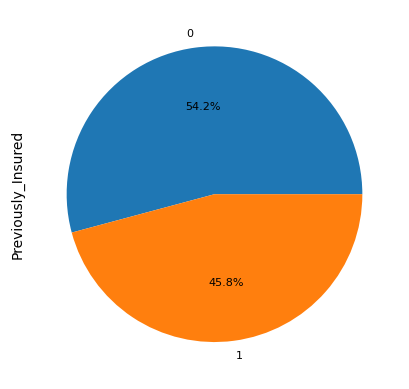

In [260]:
fig3.plot.pie(labels = fig3.index ,autopct = '%.1f%%',fontsize=8,labeldistance=1.1)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of data visualization that represent data in a circular graph, where each slice of the pie represents a proportion of the whole. Pie charts are useful for conveying relative proportions of different categories or components within a dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.54% of customers dont have any previous vehical insurance

2.45.8% of customers have previous vehical insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

4.How many customers have driving license ?

In [261]:
# Chart - 4 visualization code
fig4 = df['Driving_License'].value_counts()
fig4


1    380297
0       812
Name: Driving_License, dtype: int64

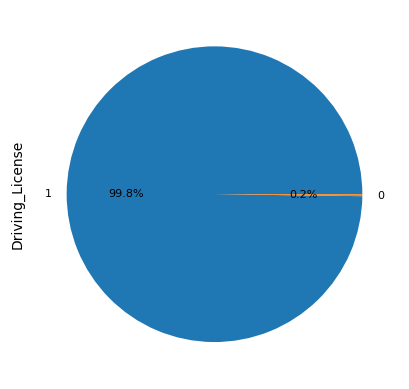

In [262]:
fig4.plot.pie(labels = fig4.index ,autopct = '%.1f%%',fontsize=8,labeldistance=1.1)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of data visualization that represent data in a circular graph, where each slice of the pie represents a proportion of the whole. Pie charts are useful for conveying relative proportions of different categories or components within a dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.99.8% customers have the driving license.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

5.Gender vs Response ?

In [263]:
# Chart - 5 visualization code
df.groupby(['Gender','Response']).size()


Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
dtype: int64

In [264]:

x = df.groupby(['Gender','Response']).size()*100/df.groupby('Gender').size()
fig5 = x.unstack()
fig5

Response,0,1
Gender,,
Female,89.609759,10.390241
Male,86.158893,13.841107


<Axes: xlabel='Gender'>

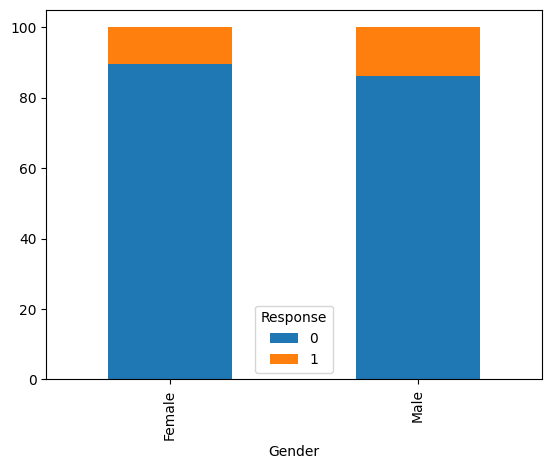

In [265]:
fig5.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.The probability of accepting plan by both genders customers are similar.

2.The probability of rejecting plan by both genders customers are similar.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

6.Vehical age vs Response?

In [266]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [267]:
# Chart - 6 visualization code
x = df.groupby(['Vehicle_Age','Response']).size()*100/df.groupby('Vehicle_Age').size()
fig6 = x.unstack()
fig6

Response,0,1
Vehicle_Age,,
1-2 Year,82.624453,17.375547
< 1 Year,95.629483,4.370517
> 2 Years,70.625351,29.374649


<Axes: xlabel='Vehicle_Age'>

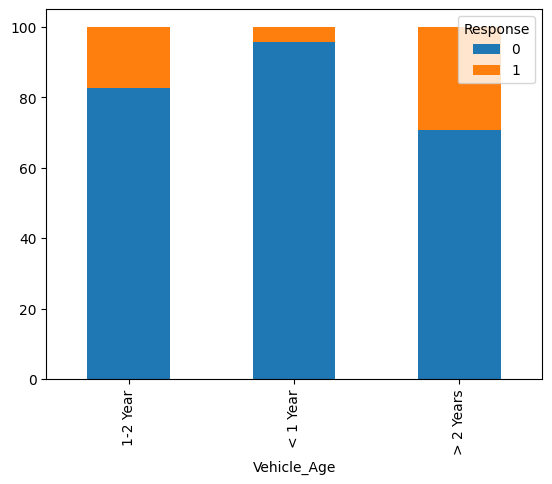

In [268]:
fig6.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.30% of Customers with vehicals age more than 2 years  are accepting plan.

2.95% of Customers with vehicals age less than year are rejecting plan .

3.17% of Customers in vehicals age between 1 and 2  are accepting plan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

7.Vehical Damage vs Response?

In [269]:
# Chart - 7 visualization code
x = df.groupby(['Vehicle_Damage','Response']).size()*100/df.groupby('Vehicle_Damage').size()
fig7 = x.unstack()
fig7

Response,0,1
Vehicle_Damage,,
No,99.479586,0.520414
Yes,76.234454,23.765546


<Axes: xlabel='Vehicle_Damage'>

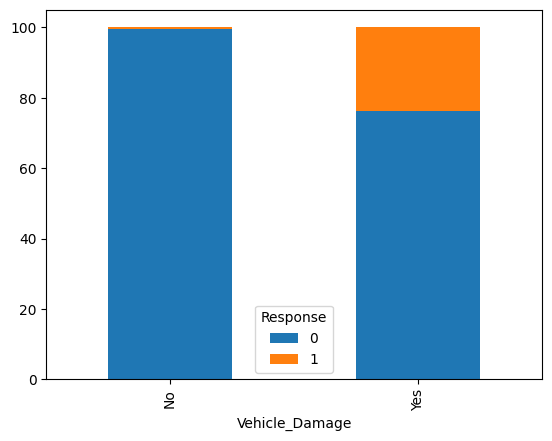

In [270]:
fig7.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.99.7% of customers without vehical damage are not accepting plan.

2.23.7% of customers with vehical damage is accepting plan

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

8.Age vs Response?

<Axes: xlabel='Age', ylabel='Count'>

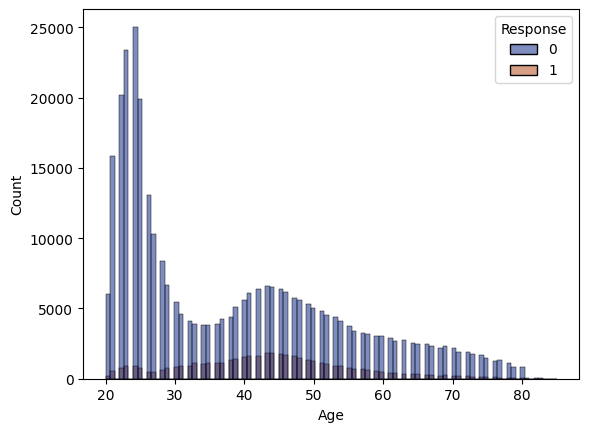

In [271]:
# Chart - 8 visualization code
sns.histplot(df,x = 'Age',hue = 'Response',palette='dark')

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Majority of the Customers between age of 20-30 and greater than 60 are not accepting plan.

2.Customers between age of 40-50 are accepting plan compare to all age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

9.Previously Insured vs Response?

In [272]:
# Chart - 9 visualization code
x = df.groupby(['Previously_Insured','Response']).size()*100/df.groupby('Previously_Insured').size()
fig9 = x.unstack()
fig9

Response,0,1
Previously_Insured,,
0,77.454584,22.545416
1,99.909522,0.090478


<Axes: xlabel='Previously_Insured'>

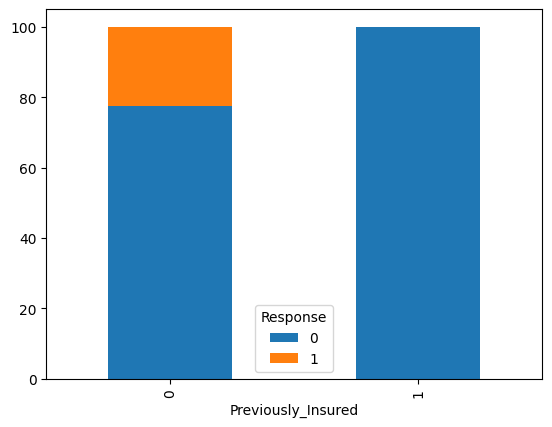

In [273]:
fig9.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Customers who are previously insuranced are not accepting the plan.

2.Only 22.5% of customers who are not insured previously are accepting the plan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

10.Vintage vs Response ?

<Axes: xlabel='Vintage', ylabel='Count'>

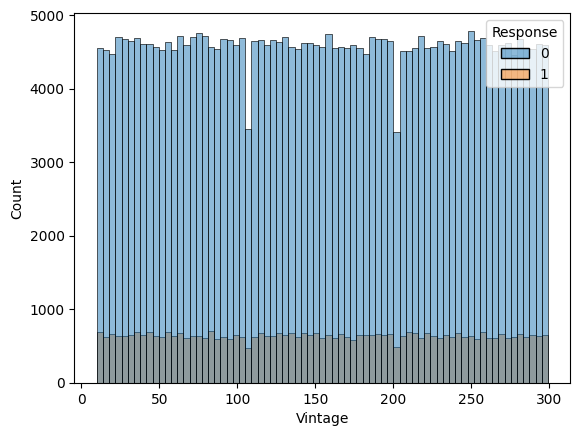

In [274]:
# Chart - 10 visualization code
sns.histplot(df,x= 'Vintage',hue = 'Response')

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.From the above distribution,there is nothing interpretable,because it is uniform distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

11.Age vs Previously Insured?

<Axes: xlabel='Age', ylabel='Count'>

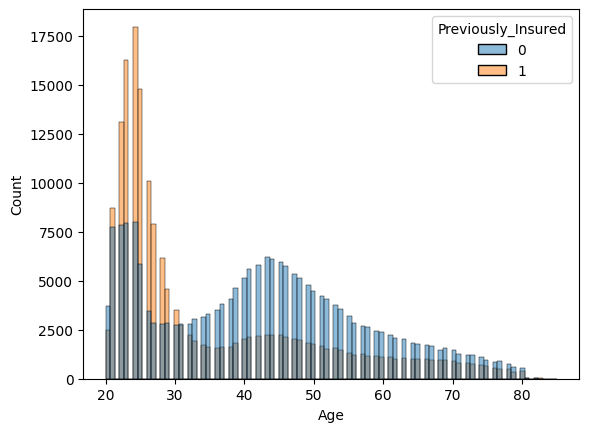

In [275]:
sns.histplot(df,x= 'Age',hue = 'Previously_Insured')

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.More number of customers of age group  between 20-30 are previously insuranced.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

12.Vehical_Age vs previously_Insuranced?

In [276]:
# Chart - 12 visualization code
x = df.groupby(['Vehicle_Age','Previously_Insured']).size()*100/df.groupby('Vehicle_Age').size()
fig12 = x.unstack()
fig12

Previously_Insured,0,1
Vehicle_Age,,
1-2 Year,67.389025,32.610975
< 1 Year,33.697644,66.302356
> 2 Years,99.712626,0.287374


<Axes: xlabel='Vehicle_Age'>

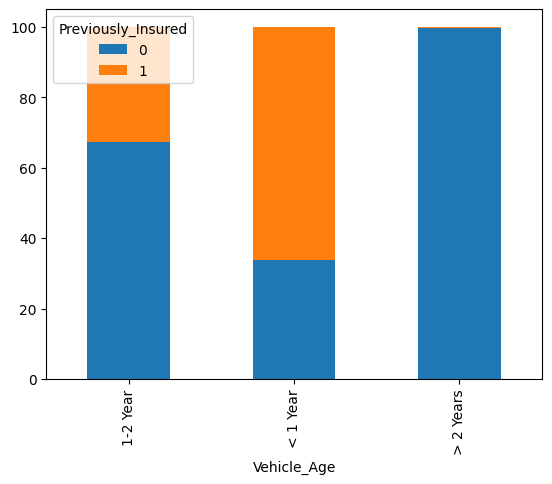

In [277]:
fig12.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.66% of customers whose vehical age is less than one year are already insuranced.

2.99% of customers whose vehical age is more than two years are not insuranced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

13.Gender vs Previously insuranced?

In [278]:
# Chart - 13 visualization code
x = df.groupby(['Vehicle_Damage','Previously_Insured']).size()*100/df.groupby('Vehicle_Damage').size()
fig13 = x.unstack()
fig13

Previously_Insured,0,1
Vehicle_Damage,,
No,12.713571,87.286429
Yes,94.843384,5.156616


<Axes: xlabel='Vehicle_Damage'>

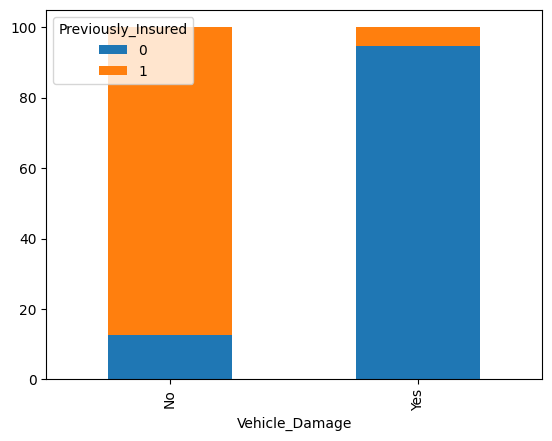

In [279]:
fig13.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.87% of the customers with no medical damage are previously insuranced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [280]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

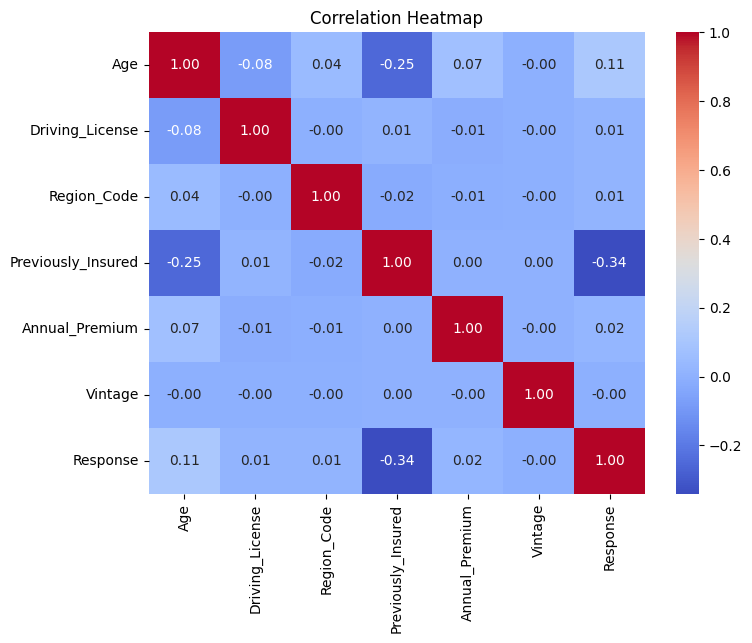

In [281]:
# Correlation Heatmap visualization code
# Compute the correlation matrix for important columns
corr = df.loc[:,['Age', 'Driving_License', 'Region_Code',
       'Previously_Insured','Annual_Premium',
       'Vintage', 'Response'
       ]].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heat map is a graphical representation of the correlation matrix, where correlation coefficients between variables are displayed as colors in a grid.Correlation heat maps provide a visually intuitive way to explore relationships between variables

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Age and response are negatively correlated with previously insuranced.

2.Remaining columns dont have correlation.

#### Chart - 15 - Pair Plot

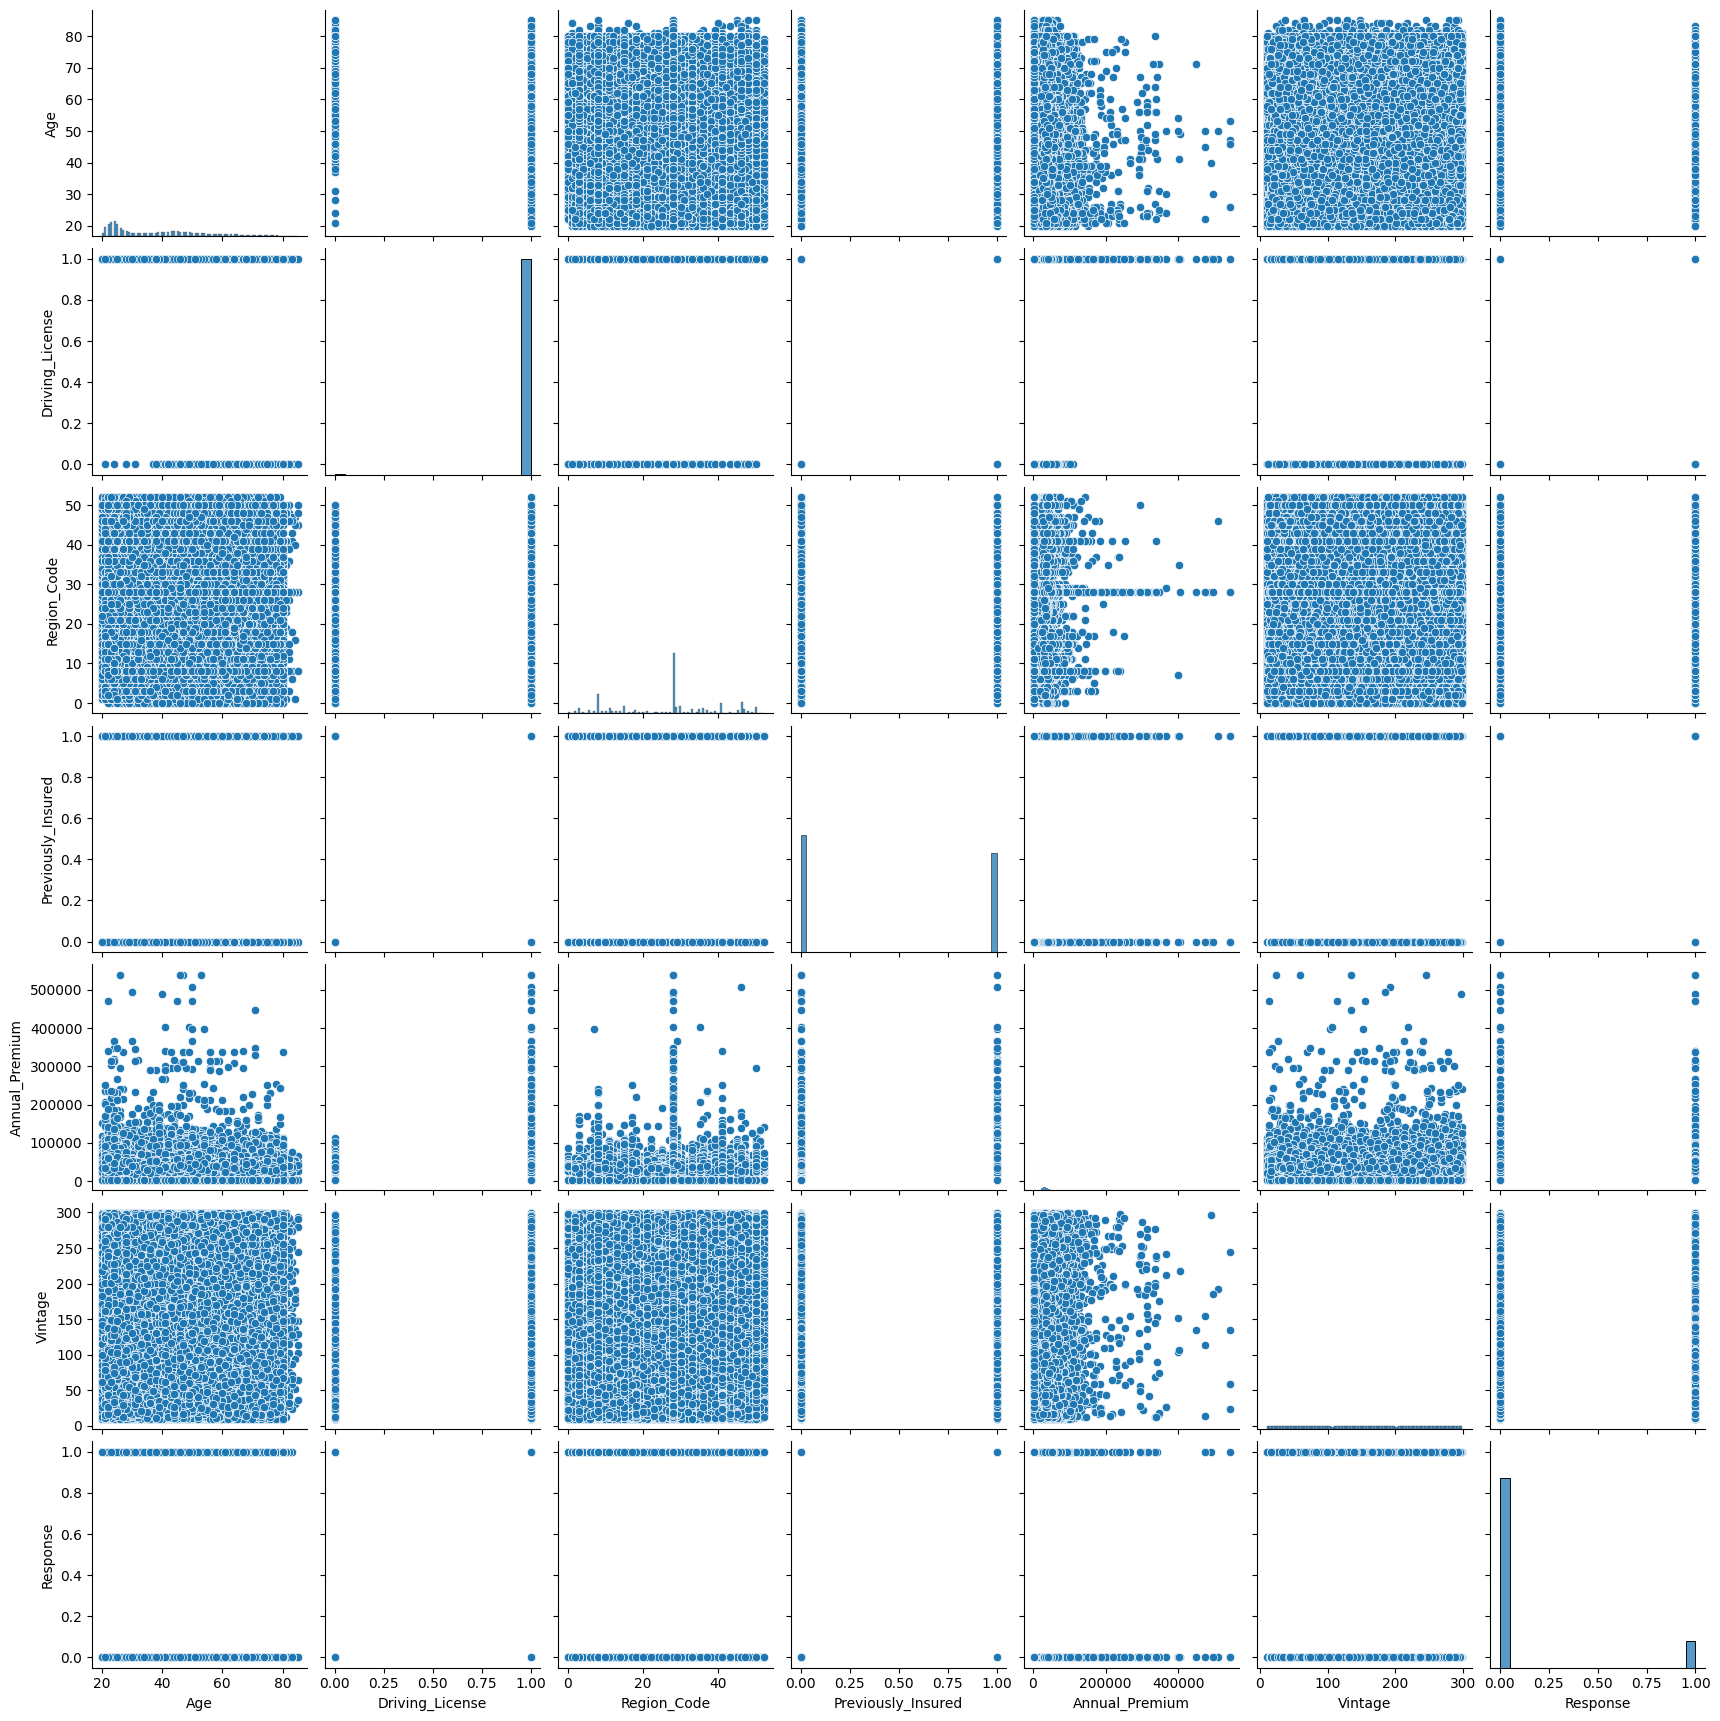

In [282]:
# Pair Plot visualization code
sns.pairplot(df.loc[:,['Age', 'Driving_License', 'Region_Code',
       'Previously_Insured','Annual_Premium',
       'Vintage', 'Response'
       ]])

##### 1. Why did you pick the specific chart?

Pair plots, also known as scatterplot matrices, are a useful visualization tool for exploring relationships between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Age and response have relation with previously insuranced.

2.Remaining columns dont have relation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [283]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [284]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [285]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [286]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values.

### 2. Handling Outliers

In [287]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [288]:
# Handling Outliers & Outlier treatments
df['Annual_Premium'].skew()

1.7660872148961309

In [289]:
df['Age'].skew()

0.6725389977260843

In [290]:
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [291]:
df['Age'].mean()+3*df['Age'].std()

85.35741661961765

In [292]:
df['Age'].mean()-3*df['Age'].std()

-7.712249488954249

In [293]:
p = np.percentile(df['Annual_Premium'],25)
q = np.percentile(df['Annual_Premium'],75)
IQR = q-p
outlier_max = q+(IQR*1.5)
outlier_min = p-(IQR*1.5)
print(outlier_min,outlier_max)

1912.5 61892.5


In [294]:
df_new = df[(df['Annual_Premium']>1912.5) & (df['Annual_Premium']<61892.5)]

In [295]:
df_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [296]:
df_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [297]:
# Encode your categorical columns
# NOW WE WILL CONVERT CATEGORICAL VALUES TO NUMERICAL VALUES
from sklearn.preprocessing import LabelEncoder


labelEncoder= LabelEncoder()
df_new['Gender'] = labelEncoder.fit_transform(df_new['Gender'])
df_new['Vehicle_Age'] = labelEncoder.fit_transform(df_new['Vehicle_Age'])
df_new['Vehicle_Damage'] = labelEncoder.fit_transform(df_new['Vehicle_Damage'])

<ipython-input-297-cc0fc2b6d6dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Gender'] = labelEncoder.fit_transform(df_new['Gender'])
<ipython-input-297-cc0fc2b6d6dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Vehicle_Age'] = labelEncoder.fit_transform(df_new['Vehicle_Age'])
<ipython-input-297-cc0fc2b6d6dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [298]:
df_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Selection

In [299]:
# Select your features wisely to avoid overfitting
x_1=df_new.drop(['Policy_Sales_Channel','Driving_License','Vintage','Response'],axis=1)
y_1 = df_new['Response']

In [300]:
x_1

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium
0,1,1,44,28.0,0,2,1,40454.0
1,2,1,76,3.0,0,0,0,33536.0
2,3,1,47,28.0,0,2,1,38294.0
3,4,1,21,11.0,1,1,0,28619.0
4,5,0,29,41.0,1,1,0,27496.0
...,...,...,...,...,...,...,...,...
381104,381105,1,74,26.0,1,0,0,30170.0
381105,381106,1,30,37.0,1,1,0,40016.0
381106,381107,1,21,30.0,1,1,0,35118.0
381107,381108,0,68,14.0,0,2,1,44617.0


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [301]:
# IMPORTING LIBRABRIES
from imblearn.over_sampling import RandomOverSampler

# initialize RandomOverSampler
random_sample = RandomOverSampler()

# apply oversampling to the dataset
randomsample =  RandomOverSampler()
x_new,y_new = randomsample.fit_resample(x_1,y_1)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_1)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 6. Data Splitting

In [302]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size = 0.3, random_state = 0)

##### What data splitting ratio have you used and why?

Answer Here.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 7. Data Scaling

In [303]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## ***7. ML Model Implementation***

### ML Model - 1

In [304]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#built regression model
lr = LogisticRegression()
#fit model to both train sets
lr.fit(x_train,y_train)
#predict values
lr_pred= lr.predict(x_test)
lr_prob = lr.predict_proba(x_test)[:,1]

In [305]:

print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     97815
           1       0.71      0.98      0.82     97566

    accuracy                           0.79    195381
   macro avg       0.83      0.79      0.78    195381
weighted avg       0.83      0.79      0.78    195381



In [306]:

recall_score(y_test, lr_pred)


0.9763647172170633

In [307]:
f1_score(y_test, lr_pred)

0.8194126653706539

In [308]:

# Get the precision scores

test_precision = precision_score(y_test,lr_pred)
print("The precision on test data is ", (test_precision))

The precision on test data is  0.705932919328304


In [309]:

# Get the accuracy scores
test_accuracy = accuracy_score(y_test,lr_pred)
print("The accuracy on test data is ", test_accuracy)

The accuracy on test data is  0.7850968108465


In [310]:


# Get the roc_auc_score scores
test_roc_auc_score = roc_auc_score(y_test,lr_prob)
print("The roc_auc_score on test data is ", test_roc_auc_score)

The roc_auc_score on test data is  0.8100953091515388


In [311]:
lr_pred

array([1, 0, 1, ..., 0, 1, 0])

In [312]:
unique_values, value_counts = np.unique(lr_pred, return_counts=True)

# Print the results
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

0: 60439
1: 134942


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[58133 39682]
 [ 2306 95260]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

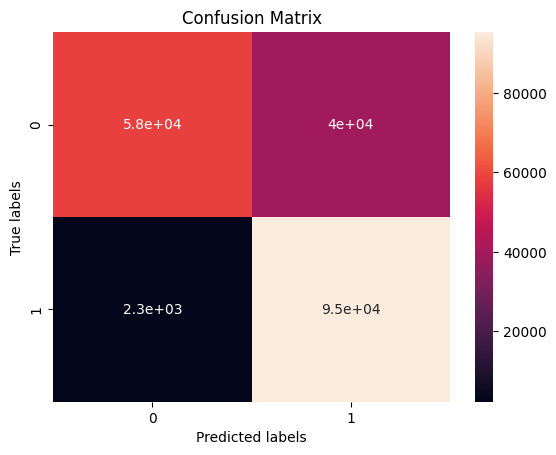

In [313]:
# Get the confusion matrix for both train and test



labels = ['0', '1']
cm = confusion_matrix(y_test, lr_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

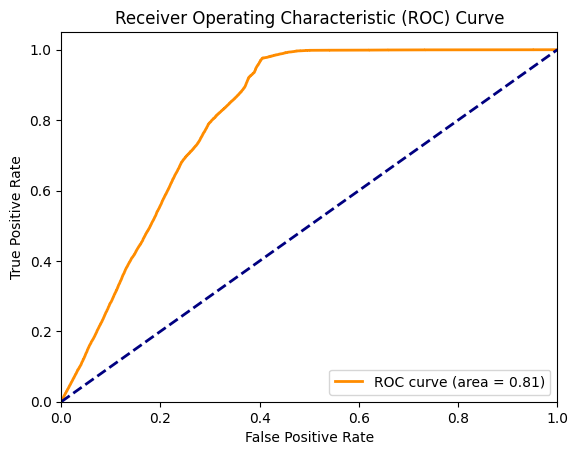

In [314]:

# Predict probabilities on the test set


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lr_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [315]:
# Visualizing evaluation Metric Score chart

rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(x_train,y_train)

# Predict on the model
# Making predictions on train and test data
rf_train_pred = rf_model.predict(x_train)
rf_test_pred = rf_model.predict(x_test)
rf_prob = rf_model.predict_proba(x_test)[:,1]

In [316]:
train_accuracy = accuracy_score(y_train,rf_train_pred)
test_accuracy = accuracy_score(y_test,rf_test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.9374555355945563


In [317]:
roc_auc_score(y_test, rf_test_pred)

0.9375319205986518

In [318]:
roc_auc_score(y_train, rf_train_pred)

1.0

[[85842 11973]
 [  247 97319]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

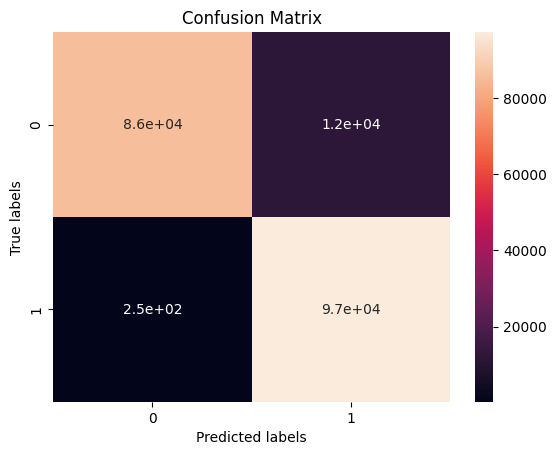

In [319]:
# Get the confusion matrix for both train and test



labels = ['0', '1']
cm = confusion_matrix(y_test, rf_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

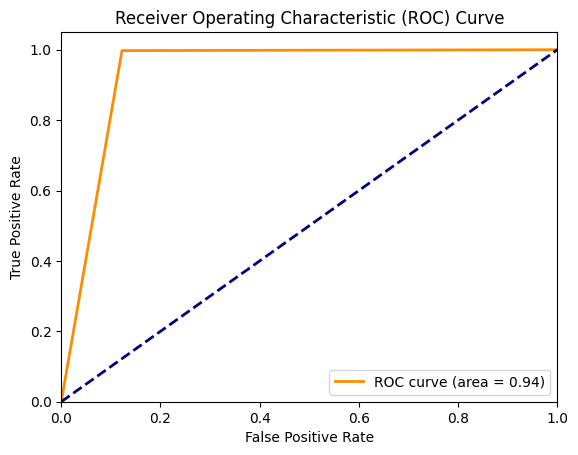

In [320]:


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [321]:
# ML Model - 3 Implementation

XG_model= XGBClassifier()
XG_model= XG_model.fit(x_train, y_train)
#Making prediction
XG_pred = XG_model.predict(x_test)
XG_prob = XG_model.predict_proba(x_test)[:,1]

# Fit the Algorithm

# Predict on the model

In [322]:
roc_auc_score(y_test, XG_pred)

0.810539489933643

In [323]:
accuracy_score(y_test,XG_pred)

0.8103756250607786

In [324]:
precision_score(y_test,XG_pred)

0.7465352181529311

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[66706 31109]
 [ 5940 91626]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

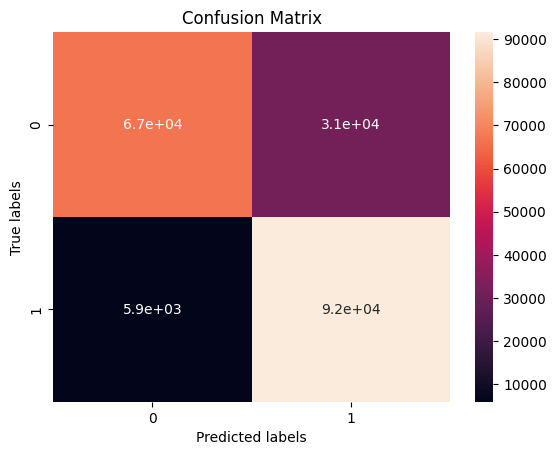

In [325]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test



labels = ['0', '1']
cm = confusion_matrix(y_test, XG_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

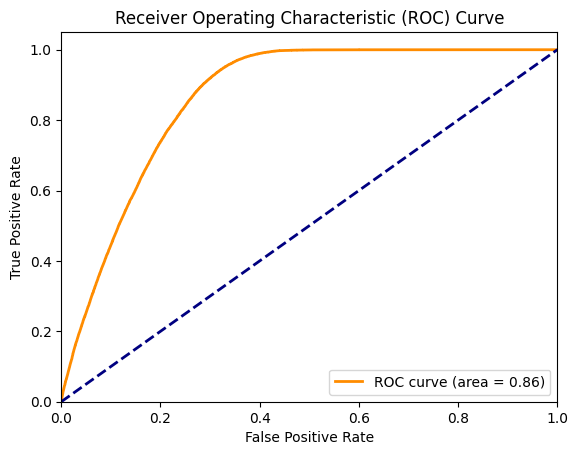

In [326]:

# Predict probabilities on the test set


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, XG_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [327]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [328]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [329]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***